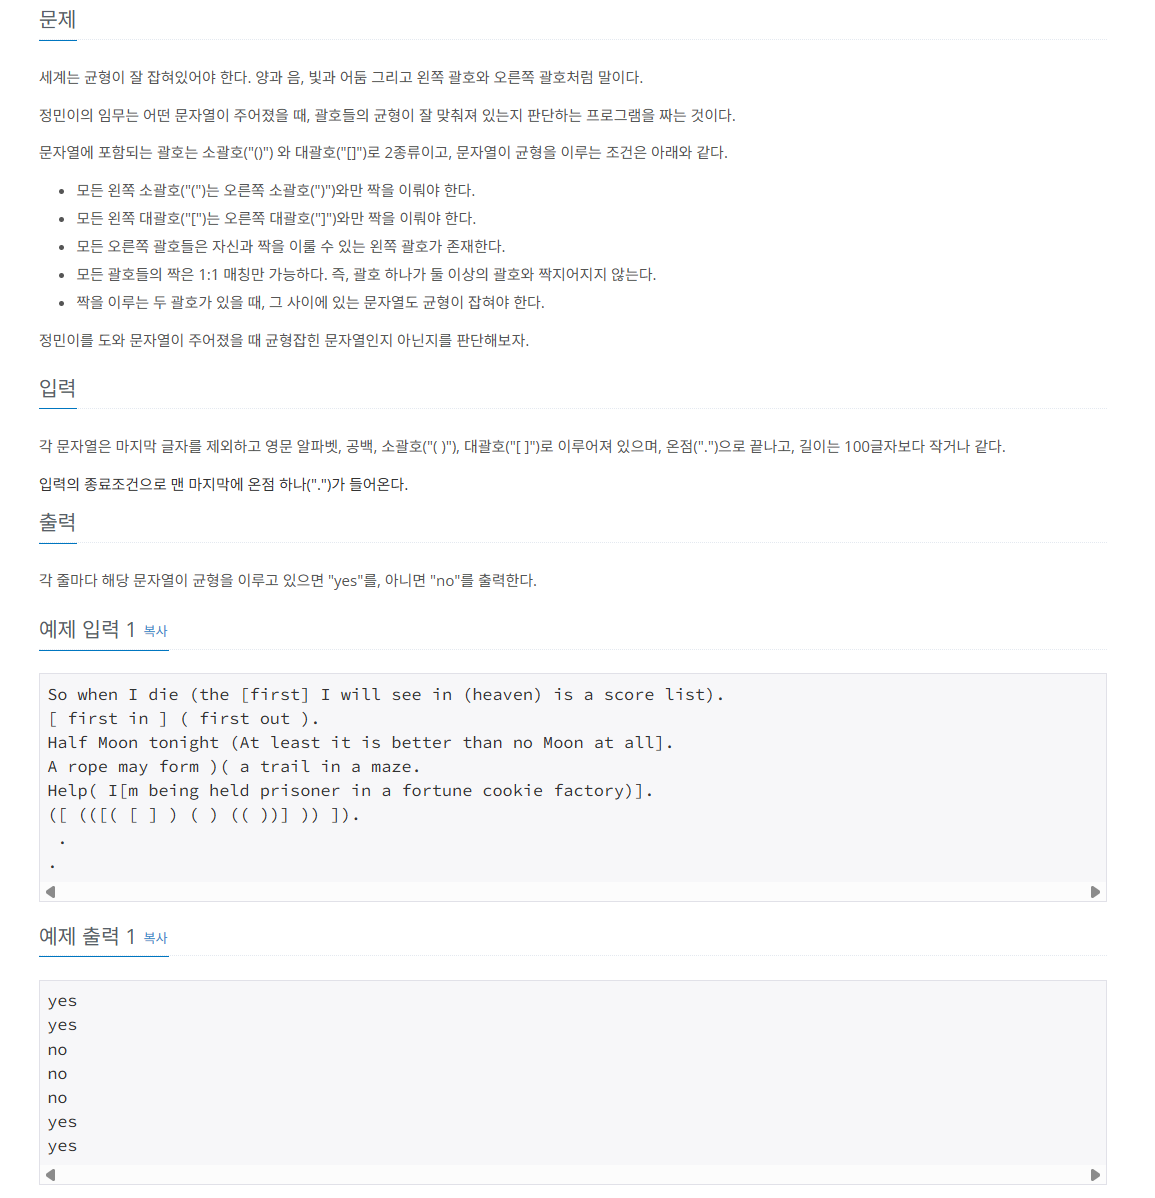

In [1]:
from PIL import Image
img= Image.open(r"C:\Users\Son\Pictures\Screenshots\스크린샷 2025-07-20 114207.png")
img

In [ ]:
import sys
from collections import deque

while True:
    sent=sys.stdin.readline().rstrip()

    if sent == '.':
        break
    
    bal=deque()
    is_bal='yes'

    for comp in sent:
        if comp=='(':
            bal.append(comp)
        elif comp=='[':
            bal.append(comp)


        if comp ==')'  :
            if bal and bal.pop()=='(':
                continue
            else:
                is_bal='no'
                break

        if comp ==']':
            if  bal and bal.pop()=='[':
                continue
            else:
                is_bal='no'
                break

        if comp=='.':
            if not bal:
                continue
            else:
                is_bal='no'

    print(is_bal)


네, '제출완료' 확인했습니다. 여러 번의 시도를 통해 문제에 점점 더 가까워지고 있는 것이 보입니다. 하지만 이번 코드 역시 몇 가지 구조적인 문제점으로 인해 오답을 출력합니다.

-----

### \#\# 총평 및 5점 척도 평가

  * **내 풀이 (User's solution): 3.0 / 5.0 점**

      * **평가:** 스택을 사용해야 한다는 점과 `deque`를 활용하는 등 올바른 방향으로 나아가고 있습니다. 하지만 **로직의 흐름 제어**에 여러 문제가 있어, 코드를 이해하기 어렵고 다양한 반례(edge case)에 취약한 상태입니다.

  * **Gemini의 풀이: 5.0 / 5.0 점**

      * **평가:** '하나의 문자에 대해서는 단 하나의 작업만 수행한다'는 원칙을 지키는 `if/elif/else` 구조를 사용하여, 코드의 흐름을 명확하고 안정적으로 만든 코드입니다.

-----

### \#\# Gemini 추천 코드

이 문제의 정석적인 풀이입니다. `for` 루프 안에서 각 문자를 `if/elif/else`로 명확하게 분기 처리하는 구조에 주목해 주세요.

```python
import sys
from collections import deque

while True:
    line = sys.stdin.readline().rstrip()
    if line == ".":
        break

    stack = deque()
    is_balanced = True # 먼저 'yes'라고 가정하고, 반례를 찾으면 'no'로 바꾼다

    for char in line:
        if char == '(' or char == '[':
            stack.append(char)
        elif char == ')':
            # 닫는 괄호가 나왔는데 스택이 비어있거나, 짝이 안 맞으면 'no'
            if not stack or stack.pop() != '(':
                is_balanced = False
                break
        elif char == ']':
            # 닫는 괄호가 나왔는데 스택이 비어있거나, 짝이 안 맞으면 'no'
            if not stack or stack.pop() != '[':
                is_balanced = False
                break
    
    # 최종 판정: 루프가 무사히 끝났고(is_balanced) 스택도 완전히 비어있어야 'yes'
    if is_balanced and not stack:
        print('yes')
    else:
        print('no')
```

-----

### \#\# 1. 알고리즘 측면

  * **내 풀이:** 스택을 사용한 접근 자체는 **올바른 알고리즘**입니다. 시간 복잡도도 O(N)으로 효율적입니다. 문제는 알고리즘의 개념이 아닌, **구현 방식**에 있습니다.
  * **개선할 점:** 로직의 분기가 너무 복잡하고 흩어져 있어, 다양한 입력에 대해 일관되게 동작하지 않습니다. 예를 들어 `(.[)]`와 같은 입력에서 올바르게 동작하기 어렵습니다.

-----

### \#\# 2. 파이썬 문법 측면 (Pythonic Style)

#### **내 풀이에서 개선할 점**

  * **여러 개의 독립적인 `if`문:** 코드에서 가장 큰 문제입니다.
    ```python
    # (사용자님 코드)
    for comp in sent:
        if comp == '(': ...
        if comp == ')': ... # 앞의 if와 별개로 또 검사
        if comp == ']': ... # 앞의 if와 별개로 또 검사
        if comp == '.': ... # 앞의 if와 별개로 또 검사
    ```
    `for` 루프가 한 번 돌 때마다 모든 `if`문을 독립적으로 체크하는 구조입니다. 이는 비효율적일 뿐만 아니라, 로직을 파악하기 매우 어렵게 만듭니다.

#### **Gemini 풀이에서 배울 점**

  * **`if/elif/else` 구조 활용:**
    ```python
    # (추천 코드)
    for char in line:
        if char == '(': ...
        elif char == ')': ...
        elif char == ']': ...
        # 다른 문자는 아예 무시
    ```
    `if/elif/else` 구조는 **하나의 문자에 대해 단 하나의 블록만 실행**하는 것을 보장합니다. 코드가 훨씬 간결해지고, 각 문자가 어떤 조건에 따라 처리되는지 명확하게 보여줍니다.

-----

### \#\# 3. 또 다른 측면: 코드의 가독성과 유지보수성

이번 코드에서 개선해야 할 가장 중요한 부분은 바로 \*\*'가독성'\*\*입니다.

  * **내가 짠 코드도 나중에 보면 남의 코드다:** 지금 작성하신 코드는 며칠 뒤에 다시 봤을 때, "내가 왜 이렇게 짰지?"라고 생각하며 로직을 다시 분석해야 할 가능성이 높습니다. 각 `if`문이 서로에게 미치는 영향을 모두 고려해야 하기 때문입니다.
  * **쉬운 수정이 어려운 코드:** 만약 문제에 `{`와 `}` 괄호가 추가된다면 어떻게 될까요? 현재 코드 구조에서는 새로운 `if` 블록을 어디에, 어떻게 추가해야 할지 매우 막막합니다. 반면 `if/elif` 구조에서는 단순히 `elif char == '{':`와 `elif char == '}':` 두 블록을 추가하기만 하면 됩니다.

이처럼 **읽기 쉽고 구조가 명확한 코드**는 버그를 줄여줄 뿐만 아니라, 나중에 기능을 추가하거나 수정하기(유지보수) 훨씬 용이합니다. 알고리즘 문제 해결 능력은 단순히 정답을 맞히는 것을 넘어, 이렇게 **구조적으로 더 나은 코드를 작성하는 능력**까지 포함합니다.